# Khadija Amin

# LGMVIP Task6-Intermediate level: Prediction using Decision Tree Algorithm

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.preprocessing as sp
from sklearn.metrics import accuracy_score

In [2]:
# load the dataset
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Checking the number of unique feature values
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [15]:
# data info
data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [16]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 5)

In [17]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
data.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [22]:
#Checking columns count of "Species"
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [19]:
# correlation
corr_matrix=data.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

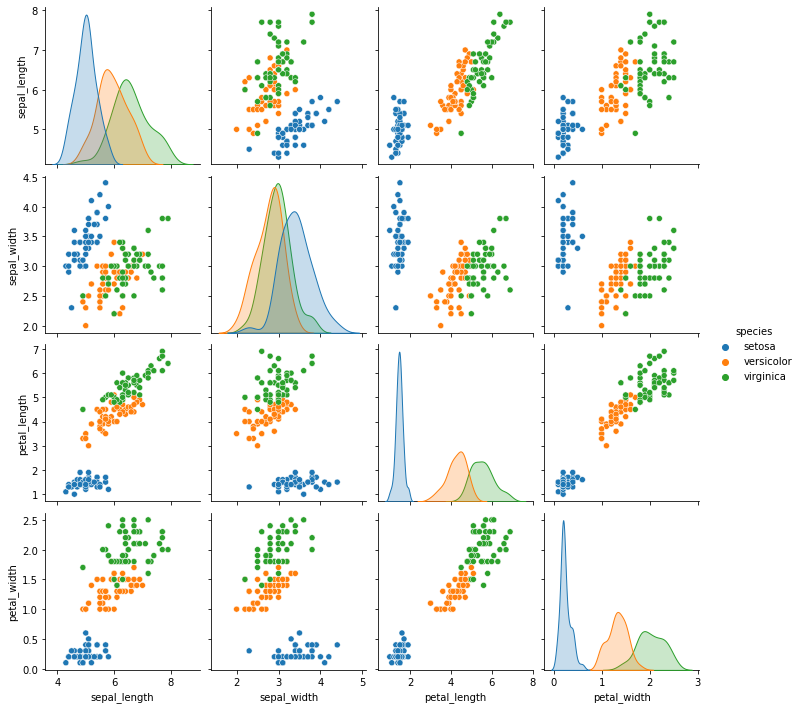

In [24]:
sns.pairplot(data,hue='species')

# pie chart

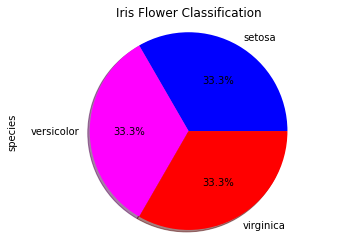

In [28]:
# Plot the pie chart
colors = ['blue', 'magenta', 'red']
data['species'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Iris Flower Classification')
plt.axis('equal')  
plt.show()

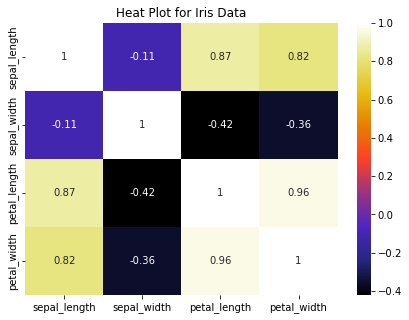

In [29]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True,cmap='CMRmap')
plt.title('Heat Plot for Iris Data')
plt.show()

# Feature Scaling

In [30]:
data=pd.read_csv('iris.csv')
data.head(5)
X=np.c_[data.iloc[:,0:4]]
Y=data.iloc[:,4]
encoder=sp.LabelEncoder()
Y_1=encoder.fit_transform(Y).reshape(-1,1)
Y_1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [56]:
# split datasset into tarin,test
train_x,test_x,train_y,test_y=train_test_split(X,Y_1)

# Model Builiding

In [57]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Model Training

In [58]:
# Model Training
clf.fit(train_x, train_y)

DecisionTreeClassifier()

In [59]:
# Make predictions on the test set
y_pred = clf.predict(test_x)
y_pred

array([2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 1])

# Accuracy of Decision Tree Classifier

In [36]:
# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


# Confusion Matrix

In [39]:
confusion_matrix = confusion_matrix(test_y, y_pred)
confusion_matrix


array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0, 16]], dtype=int64)

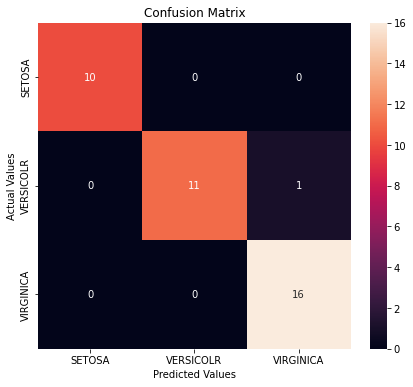

In [41]:
import seaborn as sns
confusion_matrix=pd.DataFrame(confusion_matrix,index=['SETOSA','VERSICOLR','VIRGINICA'],columns=['SETOSA','VERSICOLR','VIRGINICA'])
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Classification Report

In [42]:
report=classification_report(test_y,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



# Decision Tree Visualization

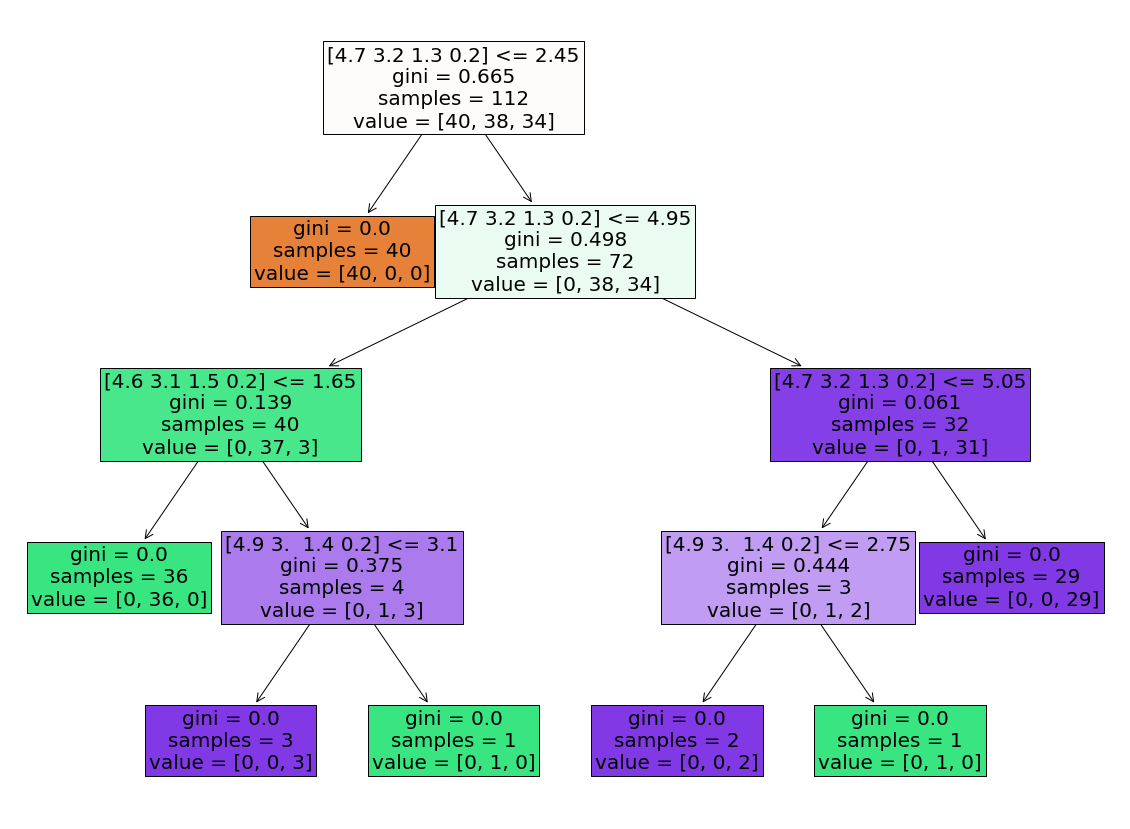

In [48]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,15))
tviz = tree.plot_tree(clf, feature_names = X, filled = True,fontsize = 20)

# The Decision Tree Algorithm is Visualized graphically for Iris Dataset. The Accuracy of model is 97%